In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


In [38]:
df_ratings = pd.read_excel('reviews_32618_for_1098_users_with_location.xlsx')
df_pers = pd.read_excel('pers_scores_1098.xlsx')

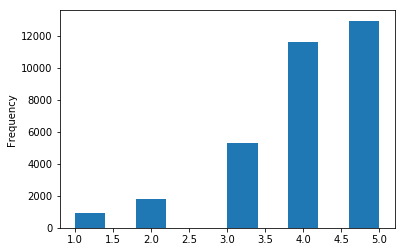

In [4]:
df_ratings['rating'].plot('hist')
plt.show()

In [5]:
df_rating_agg = df_ratings.groupby('username')['rating'].agg(['var','mean','count'])

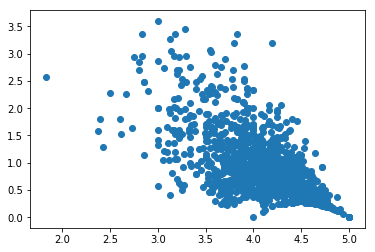

In [6]:
plt.scatter(df_rating_agg['mean'],df_rating_agg['var'])

In [7]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32580 entries, 0 to 32579
Data columns (total 12 columns):
id              32580 non-null int64
username        32580 non-null object
type            32580 non-null object
date            32580 non-null datetime64[ns]
title           32580 non-null object
text            32579 non-null object
rating          32580 non-null int64
helpfulness     24105 non-null float64
total_points    32580 non-null int64
taObject        32580 non-null object
taObjectUrl     32580 non-null object
taObjectCity    32580 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 3.0+ MB


In [8]:
df_ratings.groupby('taObjectCity').agg('count').sort_values(['id'])['id']

taObjectCity
Aachen                   1
Hayling Island           1
Prospect                 1
Hayters Hill             1
Promised Land            1
Princeville              1
Headcorn                 1
Prevessin                1
Headlam                  1
Preston Candover         1
Prospect Heights         1
Healy                    1
Hebburn                  1
Prestbury                1
Hebron                   1
Hedley on the Hill       1
Presque Isle             1
Heeze                    1
Prescot                  1
Predeal                  1
Hellam                   1
Heathcote                1
Hayfield                 1
Province of Leon         1
Haydon Bridge            1
Hartwell                 1
Hartwick                 1
Puegnago sul Garda       1
Puebla                   1
Hatfield                 1
                      ... 
Venice                 113
Istanbul               115
New Orleans            121
Boston                 124
Madrid                 127
Manchester     

In [36]:
df_ratings.groupby('taObject').agg('count').sort_values(['id'])['id']

taObject
513                                                1
Once The Musical                                   1
Once - A New Musical                               1
Ona Las Brisas                                     1
Ona Club Bena Vista                                1
Ona Cala Pi Club                                   1
OnBoard New York Tours                             1
On the Turps                                       1
On the Inlet                                       1
On the Cliff Guest House                           1
On The Rocks                                       1
On Board Tours DC                                  1
Omni Scottsdale Resort & Spa at Montelucia         1
Omni New Haven Hotel at Yale                       1
Omni La Mansion del Rio                            1
Omni Jacksonville Hotel                            1
Omni Houston Hotel                                 1
Omni Fort Worth Hotel                              1
Omni Dallas Hotel                    

In [24]:
df_pers_norm = df_pers
df_pers.describe()

,open,cons,extra,agree,neuro
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,0.645438,0.558867,0.566474,0.584330,0.458124
std,0.012748,0.010509,0.005485,0.006693,0.009233
min,0.426230,0.381220,0.469150,0.482840,0.435860
25%,0.641757,0.556050,0.565147,0.582013,0.454113
50%,0.646445,0.559180,0.567000,0.585040,0.457530
75%,0.650695,0.562797,0.568610,0.587765,0.461027
max,0.671930,0.594050,0.577100,0.606020,0.612050


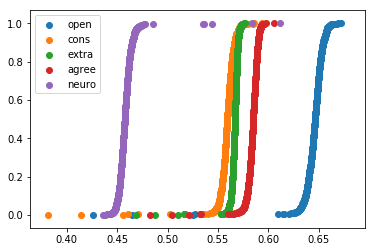

In [40]:
features = ['open','cons','extra','agree','neuro']

for i in features:
    n = len(df_pers[i])
    x = np.sort(df_pers[i])
    y = np.arange(1,n+1) / n
    plt.scatter(x,y,label=i)
plt.legend()
plt.plot()

for i in features:
    df_pers_norm[i] = (df_pers[i]-np.mean(df_pers[i]))/np.std(df_pers[i])

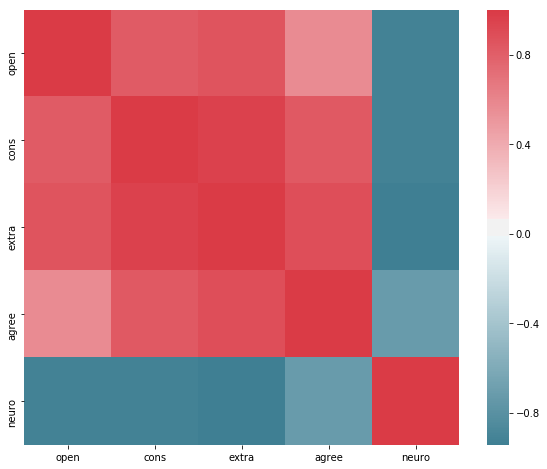

In [29]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_pers[features].corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

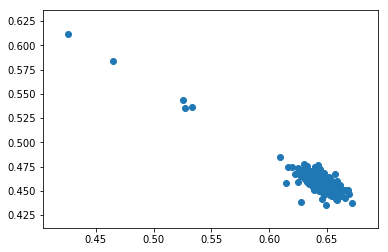

In [35]:
plt.scatter(df_pers['open'],df_pers['neuro'])
plt.show()